In [11]:
import pandas as pd
import collections
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy import stats

In [12]:
# load dataframe
df_all = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_allprojects.pkl')
df_success = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_successprojects.pkl')
df_fail = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_failprojects.pkl')

# calculate duration of the project in days
df_all['duration'] = (df_all['deadline'] - df_all['created_at']) / np.timedelta64(1, 'D')
df_success['duration'] = (df_success['deadline'] - df_success['created_at']) / np.timedelta64(1, 'D')
df_fail['duration'] = (df_fail['deadline'] - df_fail['created_at']) / np.timedelta64(1, 'D')

{2.0: 0.007231994342973314, 3.0: 0.02370487034641253, 4.0: 0.046204408302329504, 5.0: 0.07794482791871238, 6.0: 0.12053323904955524, 7.0: 0.19968339935876317, 8.0: 0.30936864689385846, 9.0: 0.41825033950195667, 10.0: 0.5721311080218888, 11.0: 0.7690020651361624, 12.0: 0.96748013210443, 13.0: 1.1623422019012108, 14.0: 1.4319348799087162, 15.0: 1.869068760195103, 16.0: 2.3917812402066745, 17.0: 2.8948066245068182, 18.0: 3.3841715750480126, 19.0: 3.8570636495857675, 20.0: 4.393436563356288, 21.0: 5.061994262617821, 22.0: 5.808898567261565, 23.0: 6.563436643711781, 24.0: 7.296680514596575, 25.0: 8.115502985206554, 26.0: 8.985351193680843, 27.0: 9.817834098049772, 28.0: 10.65554010944418, 29.0: 11.51253143908652, 30.0: 15.309730246611007, 31.0: 21.35206152016521, 32.0: 26.479545509333292, 33.0: 31.166279621043497, 34.0: 35.419094072175305, 35.0: 39.33401367650486, 36.0: 43.09625784470497, 37.0: 46.67529148954977, 38.0: 50.029329754835395, 39.0: 53.11980200406599, 40.0: 55.97001133012447, 41

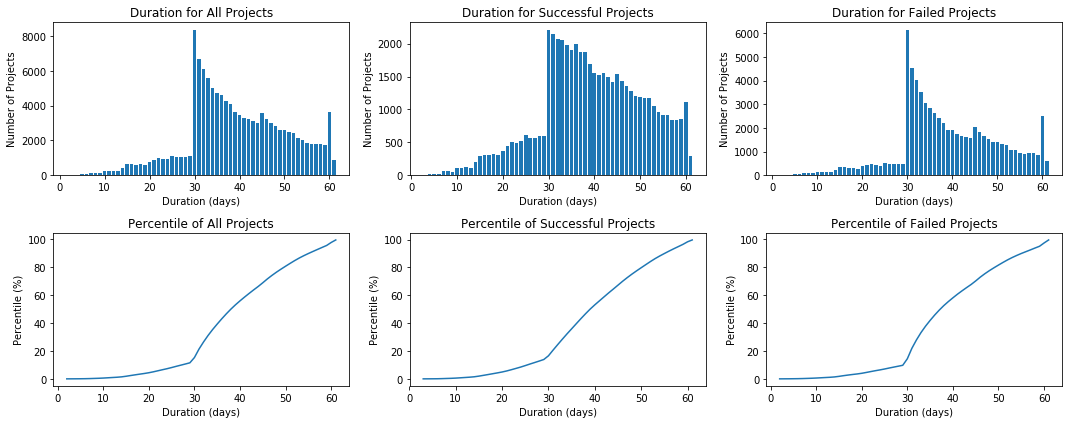

In [13]:
### DURATION FREQUENCY AND PERCENTILE

# round duration to the nearest month
df_all['rounded duration'] = list(df_all['duration'].round())
df_success['rounded duration'] = list(df_success['duration'].round())
df_fail['rounded duration'] = list(df_fail['duration'].round())

# get the frequency of each duration
duration_dict  = df_all.groupby(['rounded duration']).size().to_dict()
success_duration_dict  = df_success.groupby(['rounded duration']).size().to_dict()
fail_duration_dict  = df_fail.groupby(['rounded duration']).size().to_dict()
duration_dicts = [duration_dict, success_duration_dict, fail_duration_dict]

# plot number of projects and corresponding percentile for all/successful/failed projects
count = 0
fig = plt.figure(figsize = (15, 6))
title = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_duration_dict in duration_dicts:
    curr_duration_dict = dict((k, v) for k, v in curr_duration_dict.items() if v >= 5) # exclude outliers
    duration_lst = []
    # build list of duration of each project
    for k,v in curr_duration_dict.items():
        for i in range(v):
            duration_lst.append(k)
    duration_distr_dict = {}
    # calculate percentile of each duration
    for k in curr_duration_dict.keys():
        duration_distr_dict[k] = stats.percentileofscore(duration_lst, k)

    plt.subplot(2,3,count+1)
    plt.bar(list(curr_duration_dict.keys()),list(curr_duration_dict.values()))
    plt.xlabel('Duration (days)')
    plt.ylabel('Number of Projects')
    plt.title('Duration for ' + title[count])
    plt.subplot(2,3,count+4)
    plt.plot(list(duration_distr_dict.keys()),list(duration_distr_dict.values()))
    plt.xlabel('Duration (days)')
    plt.ylabel('Percentile (%)')
    plt.title('Percentile of ' + title[count])
    
    count += 1
    
    print(duration_distr_dict)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Duration vs. Probability of Success')

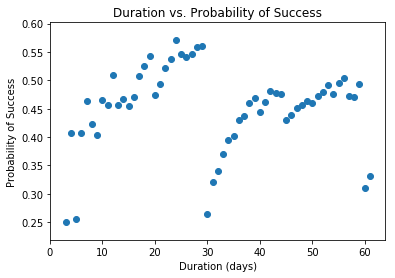

In [14]:
### PROBABILITY OF SUCCESS VS DURATION

# probability of success = number of successful projects / number of total projects given a duration
prob_success_duration_dict = {}
for k in success_duration_dict.keys():
    if duration_dict[k] > 20: # ensure sufficient number of projects
        prob_success_duration_dict[k] = success_duration_dict[k] / duration_dict[k]

plt.scatter(list(prob_success_duration_dict.keys()),list(prob_success_duration_dict.values()))
plt.xlabel('Duration (days)')
plt.ylabel('Probability of Success')
plt.title('Duration vs. Probability of Success')

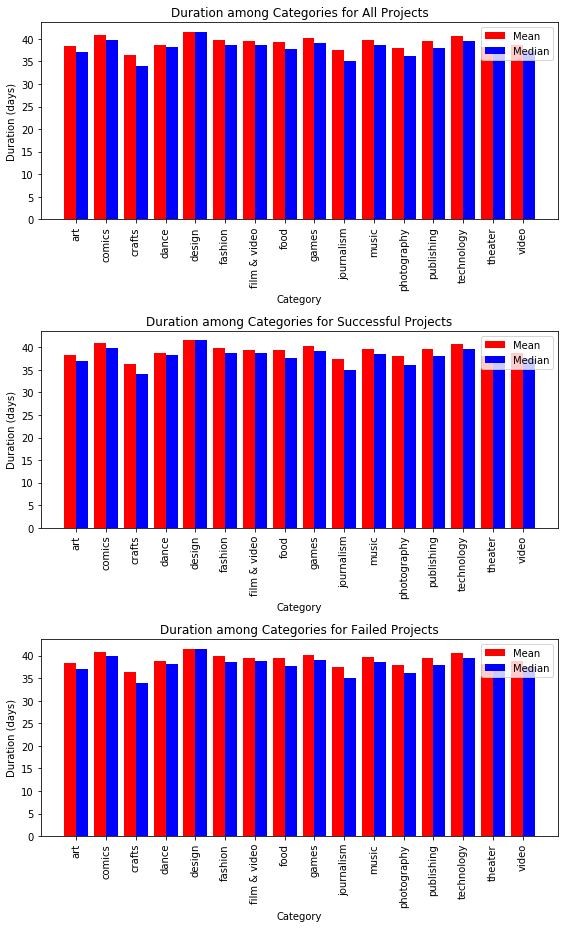

In [15]:
### DURATION FOR EACH CATEGORY

df_lst = [df_all, df_success, df_fail]
count = 0
fig = plt.figure(figsize = (8,13))
titles = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    category_freq = curr_df['category'].value_counts().to_dict()
    category_freq = dict(sorted(category_freq.items()))
    category_keys = list(category_freq.keys())

    mean_duration = []
    median_duration = []
    for i in category_keys:
        # subset dataframe for all projects with that category
        temp = df_all.loc[df_all['category'] == i]
        curr_duration = list(temp['duration'])
        # calculate mean and median durations for that category
        mean_duration.append(sum(curr_duration) / len(curr_duration))
        median_duration.append(statistics.median(curr_duration))

    # plotting
    xval = np.arange(len(category_freq))
    plt.subplot(3,1,count+1)
    plt.bar(xval - 0.2, mean_duration, 0.4, color = 'red')
    plt.bar(xval + 0.2, median_duration, 0.4, color = 'blue')
    plt.xticks(xval, category_keys, rotation='vertical')
    plt.legend(['Mean', 'Median'])
    plt.title('Duration among Categories for ' + title[count])
    plt.xlabel('Category')
    plt.ylabel('Duration (days)')
    
    count += 1
    
plt.tight_layout()
plt.show()

{1000.0: 7.500200883889112, 2000.0: 23.660506227400564, 3000.0: 36.07191643230213, 4000.0: 43.666532744073926, 5000.0: 52.72036962635597, 6000.0: 60.32422659702692, 7000.0: 63.760546404178385, 8000.0: 67.05022097227803, 9000.0: 69.75492165528324, 10000.0: 74.1313780634793, 11000.0: 78.30815588589795, 12000.0: 79.58055443953396, 13000.0: 80.7657693852953, 14000.0: 81.18400964242667, 15000.0: 83.3439132181599, 16000.0: 85.51305745279228, 17000.0: 85.90478103656086, 18000.0: 86.38489353153876, 19000.0: 86.80192848533548, 20000.0: 88.48895138609883, 21000.0: 90.15910004017678, 22000.0: 90.36922458818803, 23000.0: 90.57894736842105, 24000.0: 90.71474487746083, 25000.0: 92.05423865006027, 26000.0: 93.37324226597026, 27000.0: 93.49136199276818, 28000.0: 93.64403374849337, 29000.0: 93.76978706307754, 30000.0: 94.65809562073122, 31000.0: 95.53073523503414, 32000.0: 95.59702691844114, 33000.0: 95.69867416633186, 34000.0: 95.77621534752913, 35000.0: 96.18079550020089, 36000.0: 96.59421454399357, 

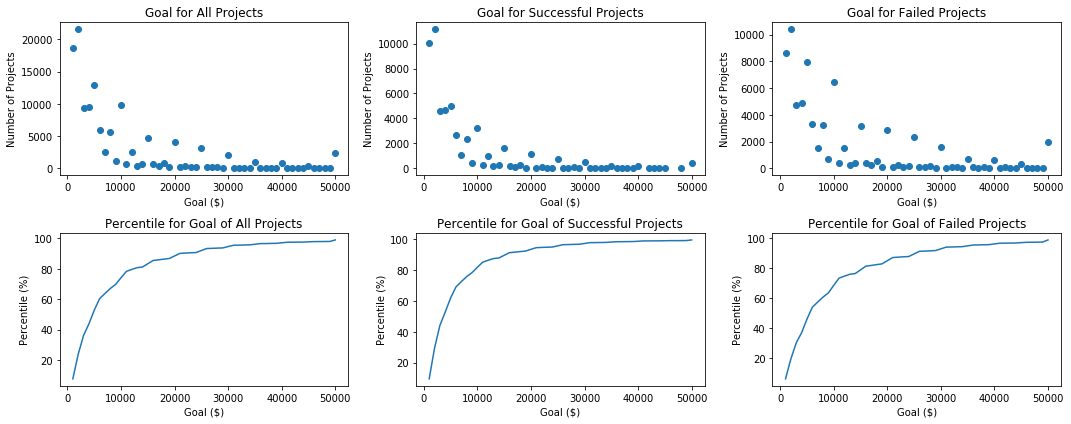

In [16]:
### GOAL FREQUENCY AND PERCENTILE
# same setup as duration

# round goal to nearest 1000
df_all['rounded goal'] = list(df_all['goal'].round(-3))
df_success['rounded goal'] = list(df_success['goal'].round(-3))
df_fail['rounded goal'] = list(df_fail['goal'].round(-3))

# get the frequency of each goal
goal_dict  = df_all.groupby(['rounded goal']).size().to_dict()
success_goal_dict  = df_success.groupby(['rounded goal']).size().to_dict()
fail_goal_dict  = df_fail.groupby(['rounded goal']).size().to_dict()
goal_dicts = [goal_dict, success_goal_dict, fail_goal_dict]

df_lst = [df_all, df_success, df_fail]
count = 0
fig = plt.figure(figsize = (15, 6))
titles = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    curr_goal_dict = goal_dicts[count]
    sorted_goal_dict = dict(sorted(curr_goal_dict.items()))

    goal_lst = []
    for k,v in sorted_goal_dict.items():
        for i in range(v):
            goal_lst.append(k)
    goal_distr_dict = {}
    for i in sorted_goal_dict.keys():
        goal_distr_dict[i] = stats.percentileofscore(goal_lst, i)
        
    # must appear frequently enough to be graphed
    sorted_goal_dict = dict((k, v) for k, v in sorted_goal_dict.items() if v >= 5) 

    plt.subplot(2,3,count+1)
    plt.scatter(list(sorted_goal_dict.keys()), list(sorted_goal_dict.values()))
    plt.xlabel('Goal ($)')
    plt.ylabel('Number of Projects')
    plt.title('Goal for ' + title[count])
    plt.subplot(2,3,count+4)
    plt.plot(list(goal_distr_dict.keys()), list(goal_distr_dict.values()))
    plt.xlabel('Goal ($)')
    plt.ylabel('Percentile (%)')
    plt.title('Percentile for Goal of ' + title[count])
    
    count += 1
    
    print(goal_distr_dict)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Goal vs. Probability of Success')

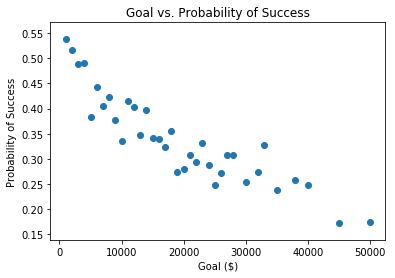

In [17]:
### PROBABILITY OF SUCCESS VS GOAL

# probability of success = number of successful projects / number of total projects given a goal size
prob_success_goal_dict = {}
for k in success_goal_dict.keys():
    if goal_dict[k] > 100: # ensure sufficient number of projects
        prob_success_goal_dict[k] = success_goal_dict[k] / goal_dict[k]

plt.scatter(list(prob_success_goal_dict.keys()),list(prob_success_goal_dict.values()))
plt.xlabel('Goal ($)')
plt.ylabel('Probability of Success')
plt.title('Goal vs. Probability of Success')

{0: 0.4271996785857774, 1000: 0.4271996785857774, 5000: 0.34786602167656605, 10000: 0.3039302959186426, 15000: 0.2736163399541304, 20000: 0.24614348677766895, 25000: 0.2302924487123527, 30000: 0.2194142042509072, 40000: 0.1922883064516129, 50000: 0.17434210526315788}


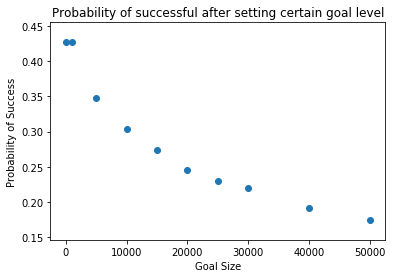

In [29]:
### CDF

thresholds = [0, 1000, 5000, 10000, 15000, 20000, 25000, 30000, 40000, 50000]

dict_all = {}
for i in thresholds:
    dict_all[i] = 0
for k, v in goal_dict.items():
    for j in thresholds:
        if k >= j:
            dict_all[j] += v # count number of projects <= current threshold 
dict_success = {}
for i in thresholds:
    dict_success[i] = 0
for k, v in success_goal_dict.items():
    for j in thresholds:
        if k >= j:
            dict_success[j] += v # count number of successful projects <= current threshold 

dict_prob = {}
for i in thresholds:
    dict_prob[i] = dict_success[i] / dict_all[i]

plt.scatter(dict_prob.keys(), dict_prob.values())
plt.xlabel('Goal Size')
plt.ylabel('Probability of Success')
plt.title('Probability of successful after setting certain goal level')

print(dict_prob)

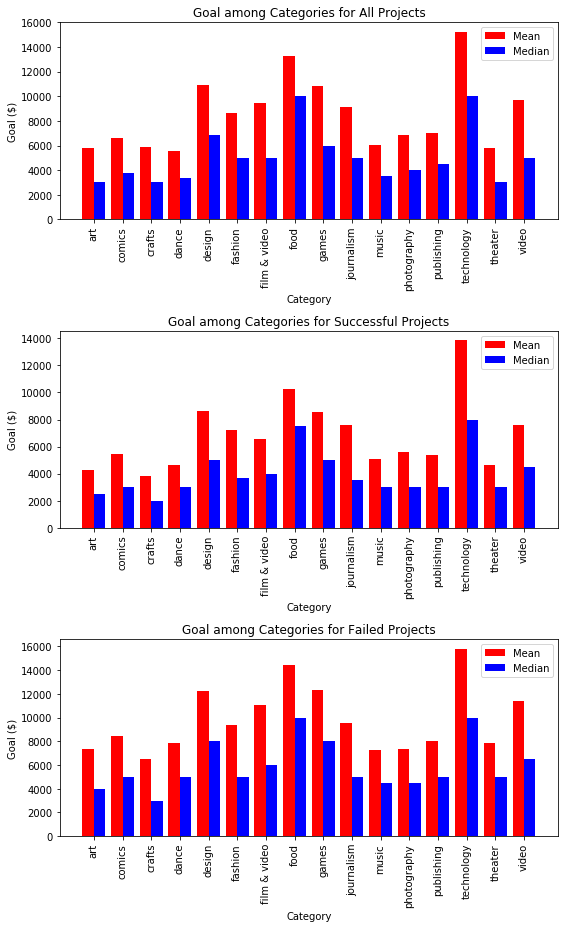

In [19]:
### GOAL FOR EACH CATEGORY
# same setup as duration

df_lst = [df_all, df_success, df_fail]
count = 0
fig = plt.figure(figsize = (8,13))
titles = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    category_freq = curr_df['category'].value_counts().to_dict()
    category_freq = dict(sorted(category_freq.items()))
    category_keys = list(category_freq.keys())

    mean_goal = []
    median_goal = []
    for i in category_keys:
        temp = curr_df.loc[curr_df['category'] == i]
        curr_goal= list(temp['goal'])
        mean_goal.append(sum(curr_goal) / len(curr_goal))
        median_goal.append(statistics.median(curr_goal))

    xval = np.arange(len(category_freq))
    plt.subplot(3,1,count+1)
    plt.bar(xval - 0.2, mean_goal, 0.4, color = 'red')
    plt.bar(xval + 0.2, median_goal, 0.4, color = 'blue')
    plt.xticks(xval, category_keys, rotation='vertical')
    plt.legend(['Mean', 'Median'])
    plt.title('Goal among Categories for ' + title[count])
    plt.xlabel('Category')
    plt.ylabel('Goal ($)')
    
    count += 1
    
plt.tight_layout()
plt.show()

{0.0: 21.335055290983938, 1000.0: 49.51569941076762, 2000.0: 60.89434175478247, 3000.0: 68.81386714020502, 4000.0: 74.3958350149326, 5000.0: 78.55355557349262, 6000.0: 81.99128258939382, 7000.0: 84.41318911938009, 8000.0: 86.24384534667851, 9000.0: 87.6923076923077, 10000.0: 89.01969489062878, 11000.0: 90.37089353458714, 12000.0: 91.36935991605456, 13000.0: 92.11881507789168, 14000.0: 92.69190410848333, 15000.0: 93.26015013318266, 16000.0: 93.9107272580515, 17000.0: 94.43982565178787, 18000.0: 94.82444103640326, 19000.0: 95.13237549439019, 20000.0: 95.45282105093227, 21000.0: 95.82088949874888, 22000.0: 96.13366696262814, 23000.0: 96.3629025748648, 24000.0: 96.54451529582694, 25000.0: 96.73783194769554, 26000.0: 96.98401808055533, 27000.0: 97.19832109129067, 28000.0: 97.35733311808863, 29000.0: 97.49616595366858, 30000.0: 97.63257728630236, 31000.0: 97.79118572927597, 32000.0: 97.94414399870853, 33000.0: 98.06723706513843, 34000.0: 98.17701186536443, 35000.0: 98.28234724352248, 36000.0

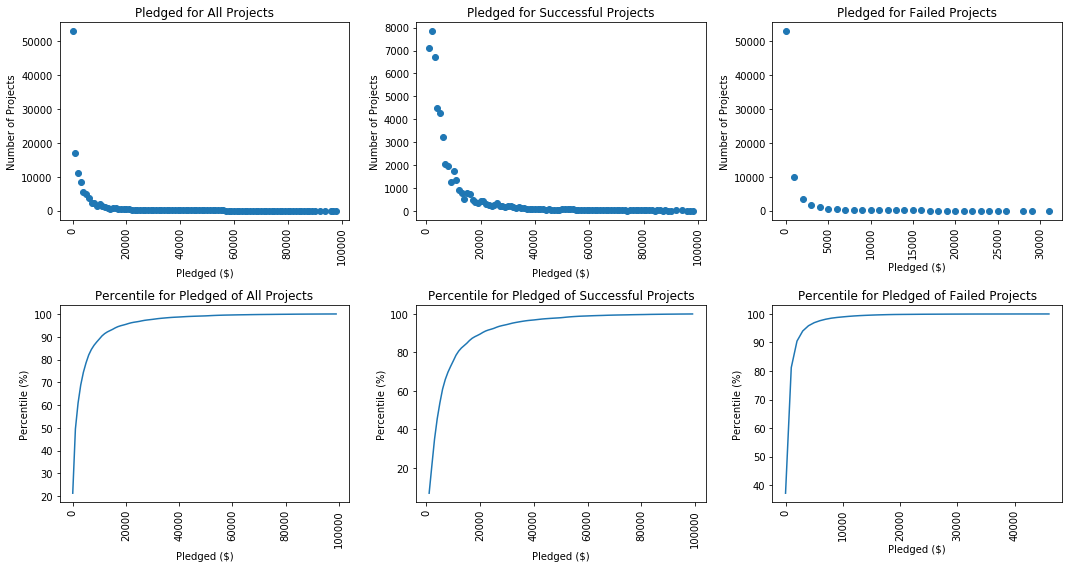

Note: Outliers excluded


In [20]:
### PLEDGED FREQUENCY AND PERCENTILE
# same setup as duration and goal

# round pledged to nearest 1000
df_all['rounded pledged'] = list(df_all['usd_pledged'].round(-3))
df_success['rounded pledged'] = list(df_success['usd_pledged'].round(-3))
df_fail['rounded pledged'] = list(df_fail['usd_pledged'].round(-3))

# get the frequency of each pledged
pledged_dict = df_all.groupby(['rounded pledged']).size().to_dict()
success_pledged_dict = df_success.groupby(['rounded pledged']).size().to_dict()
fail_pledged_dict = df_fail.groupby(['rounded pledged']).size().to_dict()
pledged_dicts = [pledged_dict, success_pledged_dict, fail_pledged_dict]

df_lst = [df_all, df_success, df_fail]
count = 0
fig = plt.figure(figsize = (15, 8))
titles = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    curr_pledged_dict = pledged_dicts[count]
    curr_pledged_dict = dict((k, v) for k, v in curr_pledged_dict.items() if k < 100000) # exclude outliers
    sorted_pledged_dict = dict(sorted(curr_pledged_dict.items()))
    
    pledged_lst = []
    for k,v in sorted_pledged_dict.items():
        for i in range(v):
            pledged_lst.append(k)
    pledged_distr_dict = {}
    for i in sorted_pledged_dict.keys():
        pledged_distr_dict[i] = stats.percentileofscore(pledged_lst, i)
        
    # must appear frequently enough to be graphed
    sorted_pledged_dict = dict((k, v) for k, v in sorted_pledged_dict.items() if v >= 5)

    plt.subplot(2,3,count+1)
    plt.scatter(list(sorted_pledged_dict.keys()), list(sorted_pledged_dict.values()))
    plt.xlabel('Pledged ($)')
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Number of Projects')
    plt.title('Pledged for ' + title[count])
    plt.subplot(2,3,count+4)
    plt.plot(list(pledged_distr_dict.keys()), list(pledged_distr_dict.values()))
    plt.xlabel('Pledged ($)')
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Percentile (%)')
    plt.title('Percentile for Pledged of ' + title[count])
    
    count += 1
    
    print(pledged_distr_dict)

plt.tight_layout()
plt.show()

print('Note: Outliers excluded')

Text(0.5, 1.0, 'Pledged vs. Probability of Success')

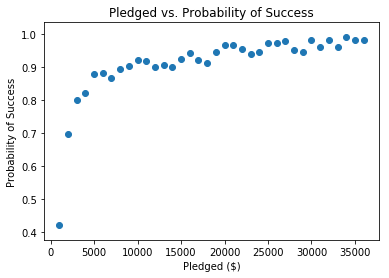

In [21]:
### PROBABILITY OF SUCCESS VS PLEDGED

# probability of success = number of successful projects / number of total projects given a pledged size
prob_success_pledged_dict = {}
for k in success_pledged_dict.keys():
    if pledged_dict[k] > 100: # ensure sufficient number of projects
        prob_success_pledged_dict[k] = success_pledged_dict[k] / pledged_dict[k]

plt.scatter(list(prob_success_pledged_dict.keys()),list(prob_success_pledged_dict.values()))
plt.xlabel('Pledged ($)')
plt.ylabel('Probability of Success')
plt.title('Pledged vs. Probability of Success')

Text(0.5, 1.0, 'Probability of successful after setting certain pledged level')

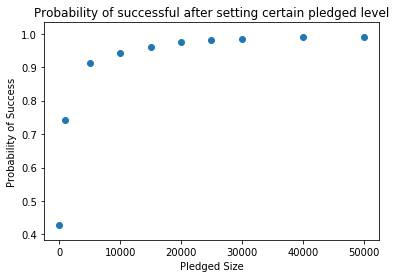

In [25]:
### CDF

thresholds = [0, 1000, 5000, 10000, 15000, 20000, 25000, 30000, 40000, 50000]

dict_all = {}
for i in thresholds:
    dict_all[i] = 0
for k, v in pledged_dict.items():
    for j in thresholds:
        if k >= j:
            dict_all[j] += v # count number of projects <= current threshold 
dict_success = {}
for i in thresholds:
    dict_success[i] = 0
    dict_prob[i] = 0
for k, v in success_pledged_dict.items():
    for j in thresholds:
        if k >= j:
            dict_success[j] += v # count number of successful projects <= current threshold 

dict_prob = {}
for i in thresholds:
    dict_prob[i] = dict_success[i] / dict_all[i]

plt.scatter(dict_prob.keys(), dict_prob.values())
plt.xlabel('Pledged Size')
plt.ylabel('Probability of Success')
plt.title('Probability of successful after setting certain pledged level')

In [26]:
import json

with open('data.json', 'w') as fp:
    json.dump(dict_prob, fp)

In [27]:
with open('data.json', 'r') as fp:
    data = json.load(fp)
    
print(data)

{'0': 0.4271996785857774, '1000': 0.7426627739673405, '5000': 0.913706785738448, '10000': 0.9432126547091138, '15000': 0.9613941018766756, '20000': 0.9752413578324509, '25000': 0.9808057371862476, '30000': 0.9849498327759197, '40000': 0.9893758300132802, '50000': 0.99079754601227}


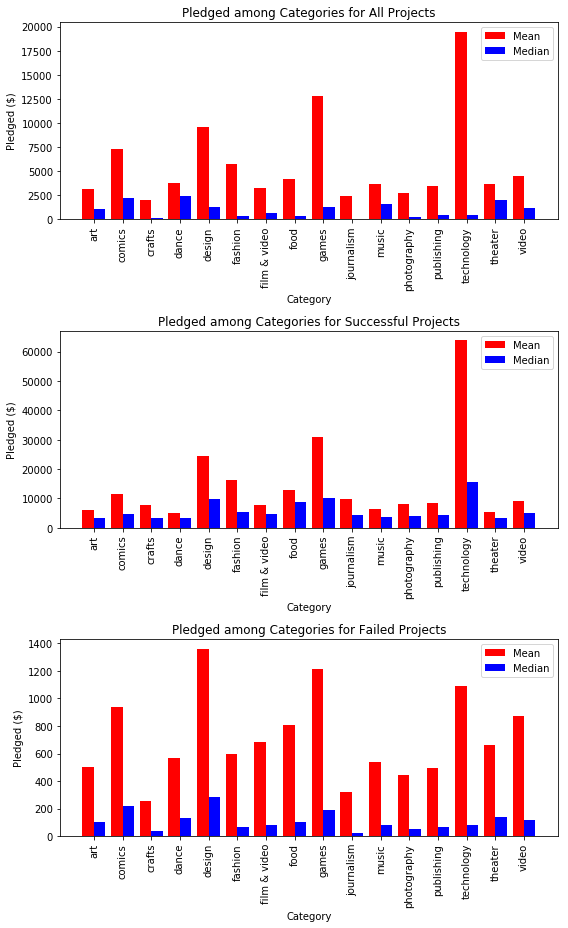

In [39]:
### PLEDGED FOR EACH CATEGORY
# same setup as duration and goal

df_lst = [df_all, df_success, df_fail]
count = 0
fig = plt.figure(figsize = (8,13))
title = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    category_freq = curr_df['category'].value_counts().to_dict()
    category_freq = dict(sorted(category_freq.items()))
    category_keys = list(category_freq.keys())

    mean_pledged = []
    median_pledged = []
    for i in category_keys:
        temp = curr_df.loc[curr_df['category'] == i]
        curr_pledged = list(temp['usd_pledged'])
        mean_pledged.append(sum(curr_pledged) / len(curr_pledged))
        median_pledged.append(statistics.median(curr_pledged))

    xval = np.arange(len(category_freq))
    plt.subplot(3,1,count+1)
    plt.bar(xval - 0.2, mean_pledged, 0.4, color = 'red')
    plt.bar(xval + 0.2, median_pledged, 0.4, color = 'blue')
    plt.xticks(xval, category_keys, rotation='vertical')
    plt.legend(['Mean', 'Median'])
    plt.title('Pledged among Categories for ' + title[count])
    plt.xlabel('Category')
    plt.ylabel('Pledged ($)')
    
    count += 1
    
plt.tight_layout()
plt.show()


{0.0: 18.31943584899515, 0.1: 41.42291782026644, 0.2: 48.59084394645126, 0.3: 52.413602162796, 0.4: 54.7339663203153, 0.5: 56.137422233803456, 0.6: 56.97534282270936, 0.7: 57.460261880720495, 0.8: 57.72816846356796, 0.9: 57.87067196508257, 1.0: 64.36842448128725, 1.1: 76.07325494283573, 1.2: 83.89303280023452, 1.3: 87.99794794957819, 1.4: 90.52310999641705, 1.5: 92.22378749877853, 1.6: 93.44728184749682, 1.7: 94.38129051170972, 1.8: 95.14714504413537, 1.9: 95.75217419628025, 2.0: 96.25826520308784, 2.1: 96.69269730627667, 2.2: 97.05099182437054, 2.3: 97.3587993876421, 2.4: 97.62344874759779, 2.5: 97.85349011432852, 2.6: 98.05706654506368, 2.7: 98.24272824989414, 2.8: 98.39541057294551, 2.9: 98.5285495586463, 3.0: 98.66372430865444, 3.1: 98.78831308426436, 3.2: 98.90353734406045, 3.3: 99.01509722810331, 3.4: 99.11892120777824, 3.5: 99.218266505977, 3.6: 99.30499006547018, 3.7: 99.37420605192013, 3.8: 99.43568613400215, 3.9: 99.49228038174653, 4.0: 99.5448031008762, 4.1: 99.597732972867

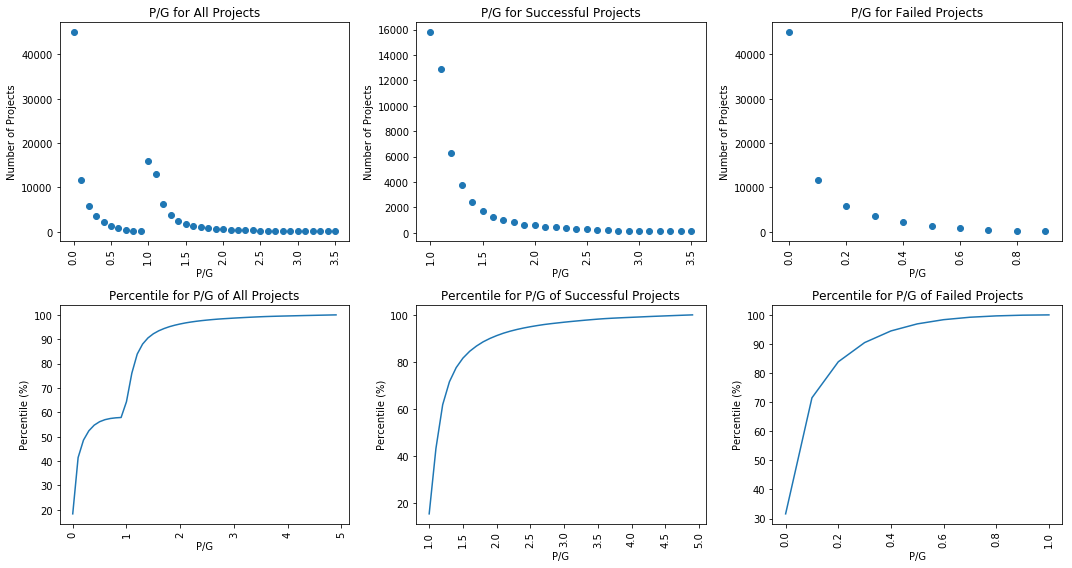

In [8]:
### P/G FREQUENCY AND PERCENTILE
# same setup as duration and goal and pledged

# round p/g to nearest tenth
df_all['rounded p/g'] = list(df_all['P/G'].round(1))
df_success['rounded p/g'] = list(df_success['P/G'].round(1))
df_fail['rounded p/g'] = list(df_fail['P/G'].round(1))

# get the frequency of each p/g
pg_dict = df_all.groupby(['rounded p/g']).size().to_dict()
success_pg_dict = df_success.groupby(['rounded p/g']).size().to_dict()
fail_pg_dict = df_fail.groupby(['rounded p/g']).size().to_dict()
pg_dicts = [pg_dict, success_pg_dict, fail_pg_dict]
print()

df_lst = [df_all, df_success, df_fail]
count = 0
fig = plt.figure(figsize = (15, 8))
titles = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    curr_pg_dict = pg_dicts[count]
    curr_pg_dict = dict((k, v) for k, v in curr_pg_dict.items() if k < 5.0) # exclude outliers
    sorted_pg_dict = dict(sorted(curr_pg_dict.items()))
    
    pg_lst = []
    for k,v in sorted_pg_dict.items():
        for i in range(v):
            pg_lst.append(k)
    pg_distr_dict = {}
    for i in sorted_pg_dict.keys():
        pg_distr_dict[i] = stats.percentileofscore(pg_lst, i)
        
    # must appear frequently enough to be graphed
    sorted_pg_dict = dict((k, v) for k, v in sorted_pg_dict.items() if v >= 100)

    plt.subplot(2,3,count+1)
    plt.scatter(list(sorted_pg_dict.keys()), list(sorted_pg_dict.values()))
    plt.xlabel('P/G')
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Number of Projects')
    plt.title('P/G for ' + title[count])
    plt.subplot(2,3,count+4)
    plt.plot(list(pg_distr_dict.keys()), list(pg_distr_dict.values()))
    plt.xlabel('P/G')
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Percentile (%)')
    plt.title('Percentile for P/G of ' + title[count])
    
    count += 1
    
    print(pg_distr_dict)

plt.tight_layout()
plt.show()

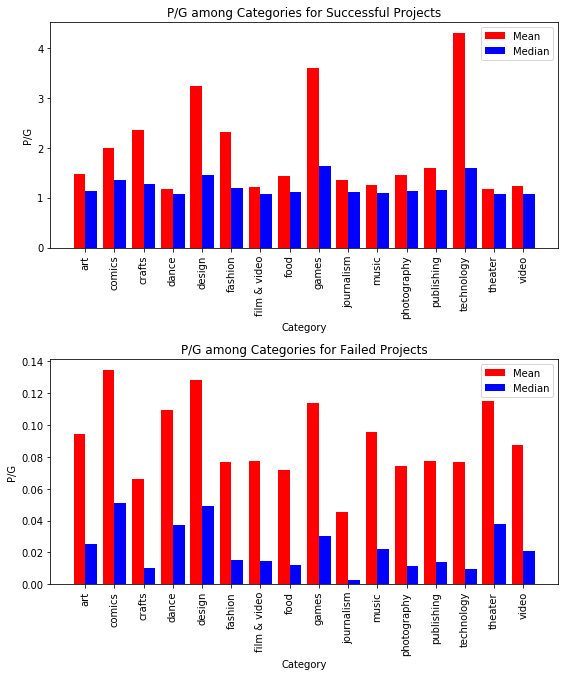

In [41]:
### P/G FOR EACH CATEGORY
# same setup as duration and goal and pledged

df_lst = [df_success, df_fail]
count = 0
fig = plt.figure(figsize = (8,13))
title = ['Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    category_freq = curr_df['category'].value_counts().to_dict()
    category_freq = dict(sorted(category_freq.items()))
    category_keys = list(category_freq.keys())

    mean_pg = []
    median_pg = []
    for i in category_keys:
        temp = curr_df.loc[curr_df['category'] == i]
        curr_pg = list(temp['P/G'])
        mean_pg.append(sum(curr_pg) / len(curr_pg))
        median_pg.append(statistics.median(curr_pg))

    xval = np.arange(len(category_freq))
    plt.subplot(3,1,count+1)
    plt.bar(xval - 0.2, mean_pg, 0.4, color = 'red')
    plt.bar(xval + 0.2, median_pg, 0.4, color = 'blue')
    plt.xticks(xval, category_keys, rotation='vertical')
    plt.legend(['Mean', 'Median'])
    plt.title('P/G among Categories for ' + title[count])
    plt.xlabel('Category')
    plt.ylabel('P/G')
    
    count += 1
    
plt.tight_layout()
plt.show()

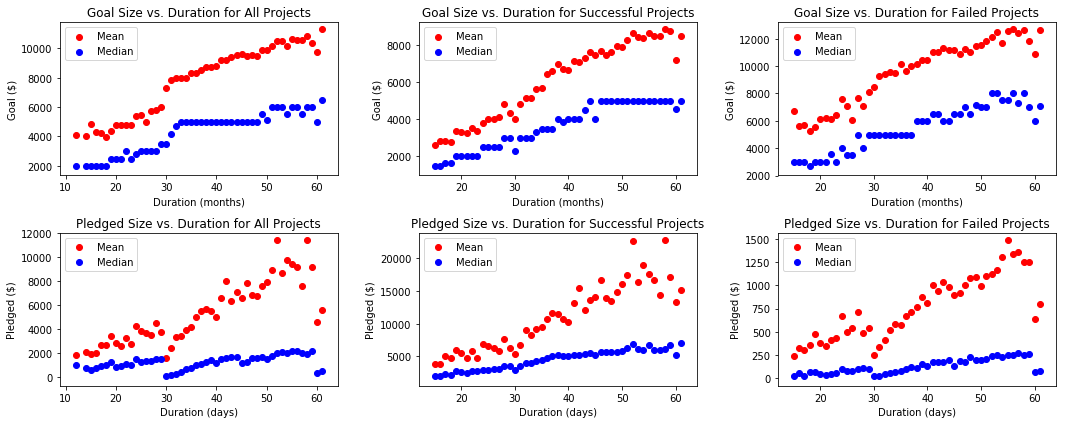

In [43]:
### GOAL VS DURATION

df_lst = [df_all, df_success, df_fail]
count = 0
fig = plt.figure(figsize = (15,6))
title = ['All Projects', 'Successful Projects', 'Failed Projects']
for curr_df in df_lst:
    curr_duration_dict = duration_dicts[count]
    dg_dict = {}
    dp_dict = {}
    for k,v in curr_duration_dict.items():
        if v > 250:
            temp = curr_df.loc[curr_df['rounded duration'] == k]
            dg_dict[round(k)] = list(temp['goal'])
            dp_dict[round(k)] = list(temp['usd_pledged'])

    mean_dg_dict = {}
    median_dg_dict = {}
    for k,v in dg_dict.items():
        mean_dg_dict[k] = sum(v) / len(v)
        median_dg_dict[k] = statistics.median(v)
    mean_dp_dict = {}
    median_dp_dict = {}
    for k,v in dp_dict.items():
        mean_dp_dict[k] = sum(v) / len(v)
        median_dp_dict[k] = statistics.median(v)

    plt.subplot(2,3,count+1)
    plt.scatter(list(mean_dg_dict.keys()), list(mean_dg_dict.values()), color = 'red')
    plt.scatter(list(median_dg_dict.keys()), list(median_dg_dict.values()), color = 'blue')
    plt.ylabel('Goal ($)')
    plt.xlabel('Duration (months)')
    plt.legend(['Mean', 'Median'])
    plt.title('Goal Size vs. Duration for ' + title[count])
    
    plt.subplot(2,3,count+4)
    plt.scatter(list(mean_dp_dict.keys()), list(mean_dp_dict.values()), color = 'red')
    plt.scatter(list(median_dp_dict.keys()), list(median_dp_dict.values()), color = 'blue')
    plt.ylabel('Pledged ($)')
    plt.xlabel('Duration (days)')
    plt.legend(['Mean', 'Median'])
    plt.title('Pledged Size vs. Duration for ' + title[count])
    
    count += 1
    
plt.tight_layout()
plt.show()

In [45]:
### SAVE DATAFRAMES

df_all.to_pickle('../Desktop/saved_dataframes/Store_subset_allprojects_dgpp.pkl')
df_success.to_pickle('../Desktop/saved_dataframes/Store_subset_successprojects_dgpp.pkl')
df_fail.to_pickle('../Desktop/saved_dataframes/Store_subset_failprojects_dgpp.pkl')